In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def f(x):
    return np.power(x[0], 2) + np.power(x[1], 2) + 1 + np.sin(x[0]*x[1])

In [3]:
xlin = np.linspace(-3, 3, 101)
ylin = np.linspace(-3, 3, 101)

In [4]:
X, Y = np.meshgrid(xlin, ylin)

In [5]:
Z = f([X, Y])

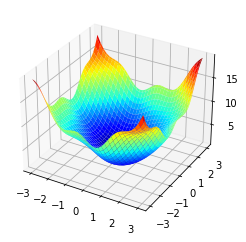

In [6]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_surface(X, Y, Z, cmap="jet")

In [7]:
sol1 = optimize.minimize(f, [1, 1])
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0
        x: [-6.495e-09 -6.495e-09]
      nit: 4
      jac: [ 1.490e-08  1.490e-08]
 hess_inv: [[ 6.667e-01 -3.333e-01]
            [-3.333e-01  6.667e-01]]
     nfev: 15
     njev: 5

In [8]:
def c(x):
    return np.power(x[0] + 1, 2) + np.power(x[1] + 1, 2)

In [9]:
C = c([X, Y])

In [10]:
sol2 = optimize.minimize(f, [-1, -1], constraints=[optimize.NonlinearConstraint(c, -np.inf, 1)])
sol2

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.2572541300381623
       x: [-2.929e-01 -2.929e-01]
     nit: 6
     jac: [-8.776e-01 -8.776e-01]
    nfev: 19
    njev: 6

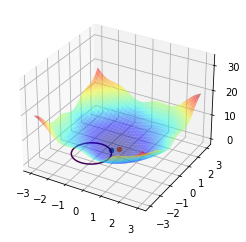

In [11]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_surface(X, Y, Z, cmap="jet", alpha=0.5)
axe.scatter(*sol2.x, f(sol2.x))
axe.scatter(0, 0, 1)
axe.contour(X, Y, C, [1], offset=1)

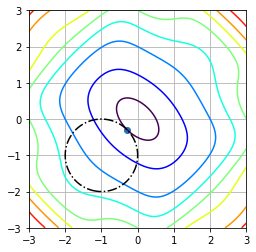

In [12]:
fig, axe = plt.subplots()
axe.contour(X, Y, Z, cmap="jet")
axe.contour(X, Y, Z, [sol2.fun])
axe.scatter(*sol2.x, marker="o")
axe.contour(X, Y, C, [1], linestyles="-.", colors="k")
axe.set_aspect("equal")
axe.grid()

In [13]:
(np.sqrt(2) - 1)*np.cos(np.pi/4)

0.29289321881345254